## Predicting Survival on the Titanic using Logistic Regression
 

My model will use the independent variables class, sex, age sibsp, and parch to predict the dependent variable survived.  

In [31]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
#reading the data from the disk into memory
df = pd.read_csv("C:\\Users\\TVita\\Documents\\GitHub\\Data-Science-Essentials\\Titanic EDA\\train.csv")

In [33]:
#Just a reminder, here are all the column names
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [34]:
# create a new dataframe and put only these variables I'm going to be using into it.
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['survived'] = df['Survived']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

In [35]:
#Get dummies so now female = 1, male = 0
X['sex'] = pd.get_dummies(X.sex)['female']

getting average age based on class sibsp and other ages that share similar traits

In [36]:
X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 1)].mean()

8.0

In [37]:
X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 0)].mean()

6.7368421052631575

In [38]:
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()

23.849056603773583

In [39]:
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

28.816666666666666

In [40]:
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()

32.107142857142854

In [41]:
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

33.63125

In [42]:
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()

36.285714285714285

In [43]:
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

42.506410256410255

In [44]:
#Setting average age of null ages based on class sibsp and other ages that share similar traits

female_P3_no_parch = X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()
male_P3_no_parch = X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()


female_P2_no_parch = X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()
male_P2_no_parch = X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()


female_P1_no_parch = X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()
male_P1_no_parch = X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

In [45]:

female_children = X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 1)].mean()
male_children = X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 0)].mean()

In [46]:
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull())] = female_P3_no_parch
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull())] = male_P3_no_parch

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [47]:
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull())] = female_P2_no_parch 
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull())] = male_P2_no_parch 

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull())] = male_P1_no_parch
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull())] = female_P1_no_parch

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [49]:
X[(X.age.isnull())]

,sex,age,survived,pclass,sibsp,parch
65,0,NaN,1,3,1,1
128,1,NaN,1,3,1,1
140,1,NaN,0,3,0,2
159,0,NaN,0,3,8,2
166,1,NaN,1,1,0,1
176,0,NaN,0,3,3,1
180,1,NaN,0,3,8,2
201,0,NaN,0,3,8,2
229,1,NaN,0,3,3,1
324,0,NaN,0,3,8,2


In [50]:
#at this point only a few null ages are left and very few outside of the spectrum above for children and adults. I will assume 
#all remaining null ages are children
X.age[(X.age.isnull()) & (X.sex == 1)] = female_children
X.age[(X.age.isnull()) & (X.sex == 0)] = male_children

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
X[(X.age.isnull())]

,sex,age,survived,pclass,sibsp,parch


In [53]:
#survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X.pop("survived")

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Grid Search

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [8,10,12]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

Populating the interactive namespace from numpy and matplotlib


In [111]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [8, 10, 12], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [112]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
best_rfc = estimator.best_estimator_

In [114]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.883268983269


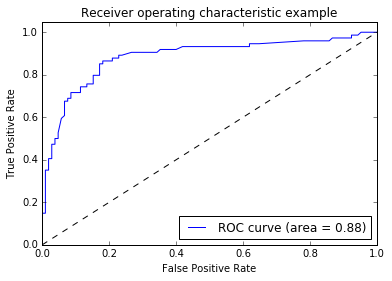

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [137]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, X, y, cv=20)

On 20 folds the best run results is .93 however the mean score is .825 

In [138]:
scores

array([ 0.73913043,  0.82608696,  0.73333333,  0.88888889,  0.75555556,
        0.77777778,  0.86666667,  0.88888889,  0.86666667,  0.88636364,
        0.84090909,  0.81818182,  0.75      ,  0.93181818,  0.79545455,
        0.79545455,  0.84090909,  0.84090909,  0.84090909,  0.81818182])

In [139]:
scores[13]

0.93181818181818177

In [142]:
mean_score = scores.mean()
mean_score

0.82510430390865186